In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Bangkok Housing Condo Apartment Prices.csv"
df = pd.read_csv(file_path)

# Generate summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)

       Area (sq. ft.)    Bedrooms   Bathrooms   Price (THB)
count      563.000000  563.000000  563.000000  5.630000e+02
mean       931.758437    2.317940    1.817052  3.991119e+06
std        540.198921    1.241404    0.924322  2.508461e+06
min         10.000000    1.000000    1.000000  3.000000e+05
25%        550.000000    1.000000    1.000000  2.200000e+06
50%        850.000000    2.000000    2.000000  3.300000e+06
75%       1250.000000    3.000000    2.000000  5.000000e+06
max       2200.000000    5.000000    4.000000  1.000000e+07


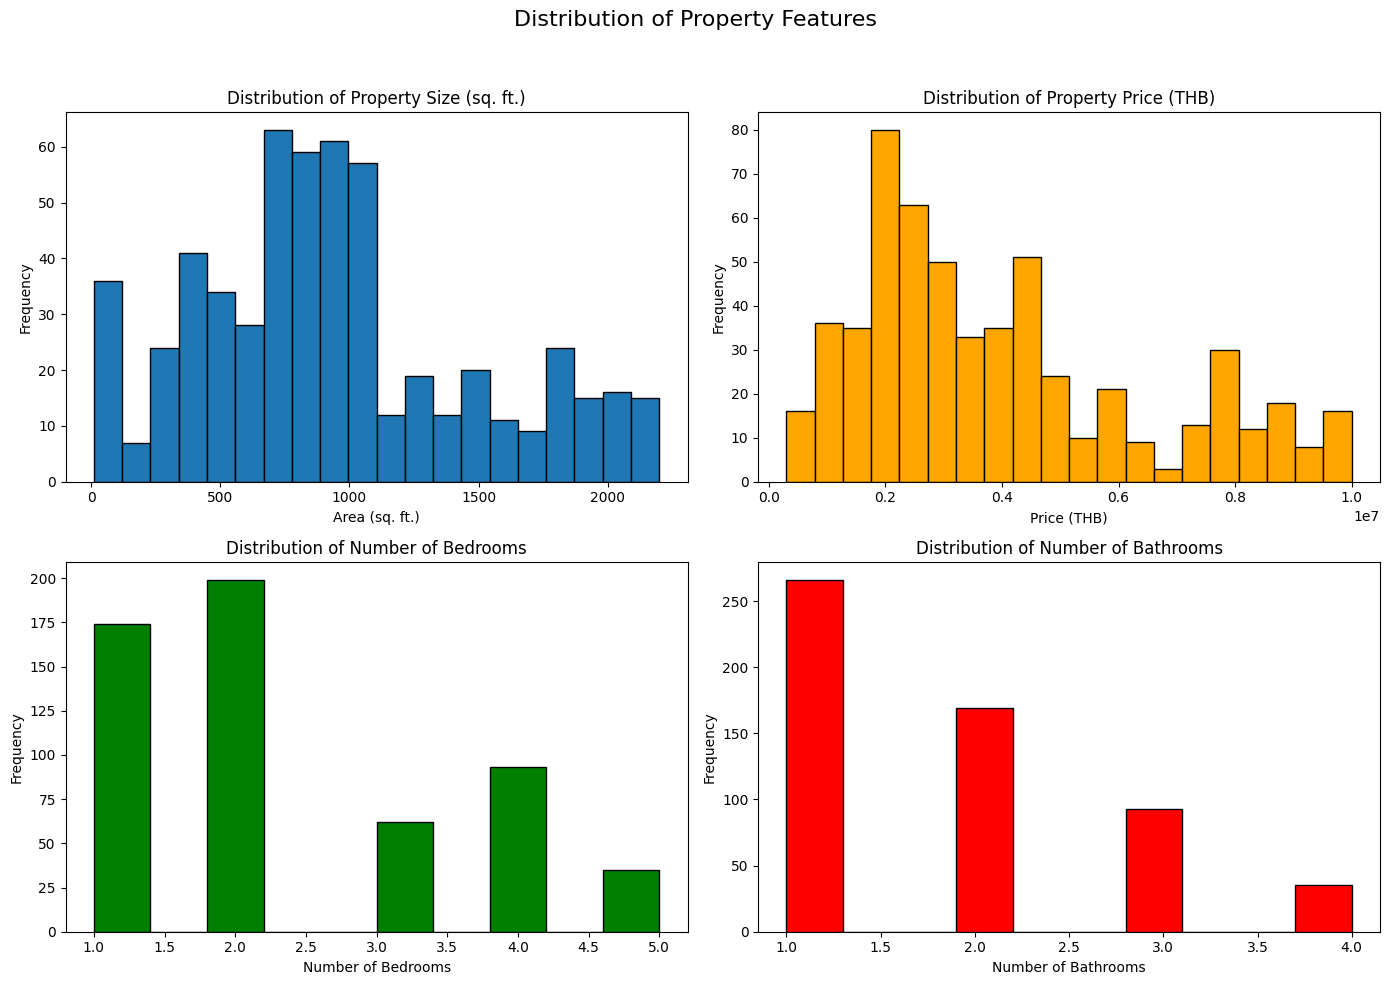

In [4]:
import matplotlib.pyplot as plt

# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Property Features', fontsize=16)

# Distribution of Area (sq. ft.)
axs[0, 0].hist(df['Area (sq. ft.)'], bins=20, edgecolor='black')
axs[0, 0].set_title('Distribution of Property Size (sq. ft.)')
axs[0, 0].set_xlabel('Area (sq. ft.)')
axs[0, 0].set_ylabel('Frequency')


# Distribution of Price (THB)
axs[0, 1].hist(df['Price (THB)'], bins=20, edgecolor='black', color='orange')
axs[0, 1].set_title('Distribution of Property Price (THB)')
axs[0, 1].set_xlabel('Price (THB)')
axs[0, 1].set_ylabel('Frequency')


# Distribution of Bedrooms
axs[1, 0].hist(df['Bedrooms'], bins=10, edgecolor='black', color='green')
axs[1, 0].set_title('Distribution of Number of Bedrooms')
axs[1, 0].set_xlabel('Number of Bedrooms')
axs[1, 0].set_ylabel('Frequency')


# Distribution of Bathrooms
axs[1, 1].hist(df['Bathrooms'], bins=10, edgecolor='black', color='red')
axs[1, 1].set_title('Distribution of Number of Bathrooms')
axs[1, 1].set_xlabel('Number of Bathrooms')
axs[1, 1].set_ylabel('Frequency')


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



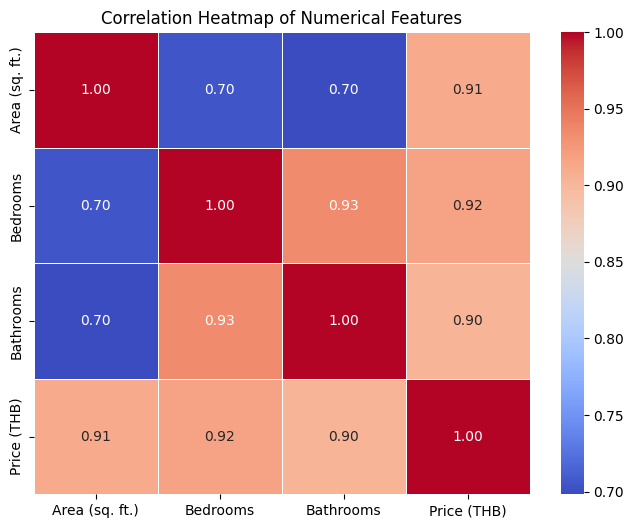

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

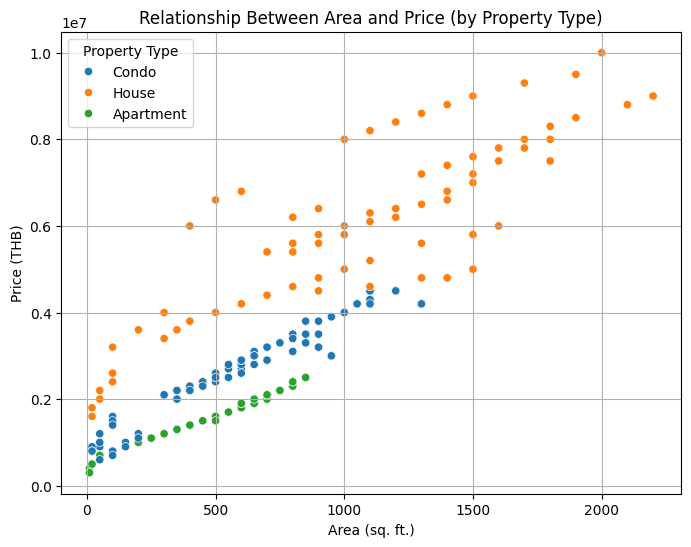

In [6]:
# Scatter plot: Area vs Price (colored by Property Type)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area (sq. ft.)', y='Price (THB)', hue='Property Type', data=df)
plt.title('Relationship Between Area and Price (by Property Type)')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Price (THB)')
plt.legend(title='Property Type')
plt.grid(True)
plt.show()

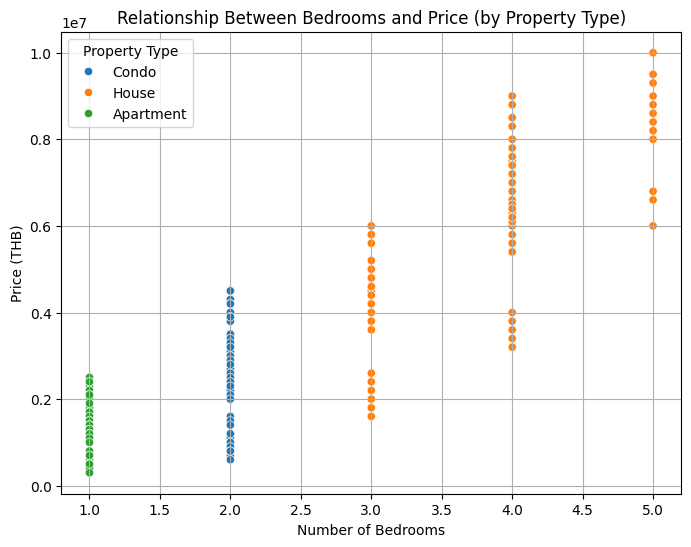

In [7]:
# Scatter plot: Bedrooms vs Price (colored by Property Type)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bedrooms', y='Price (THB)', hue='Property Type', data=df)
plt.title('Relationship Between Bedrooms and Price (by Property Type)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (THB)')
plt.legend(title='Property Type')
plt.grid(True)
plt.show()

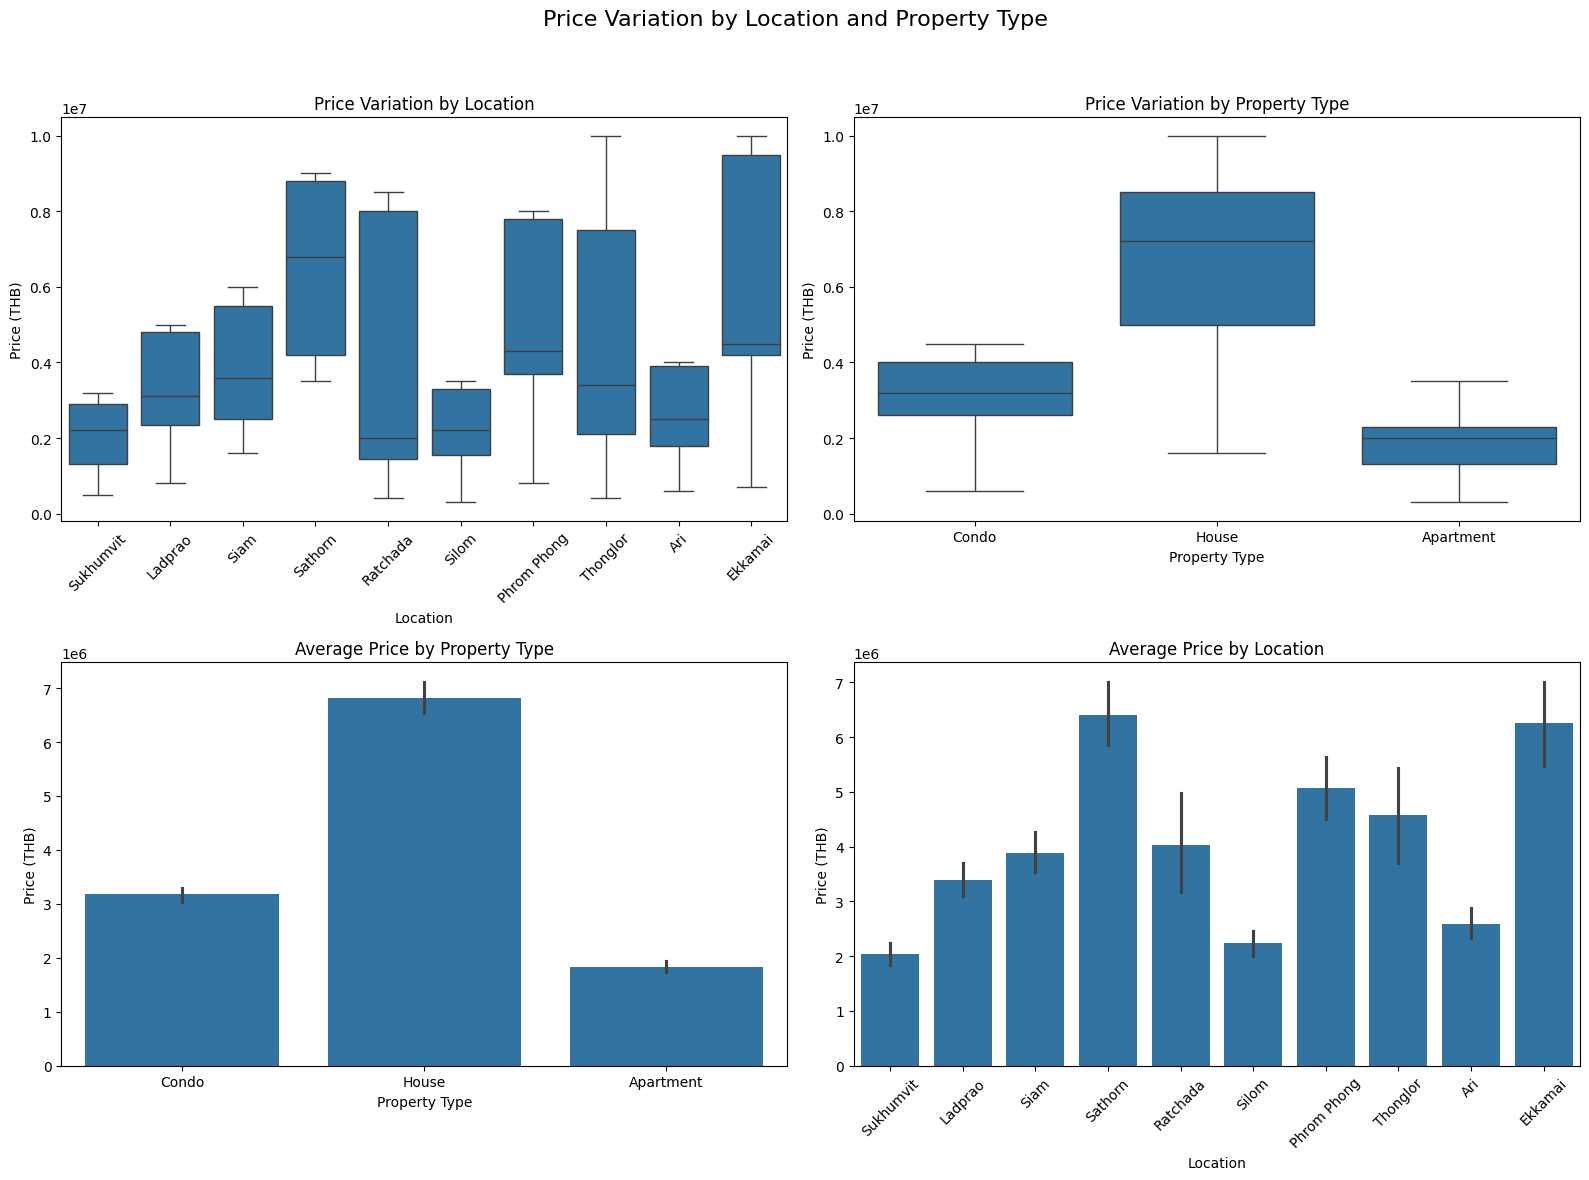

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Price Variation by Location and Property Type', fontsize=16)

# Box plot: Price variation by Location
sns.boxplot(x='Location', y='Price (THB)', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Price Variation by Location')
axs[0, 0].tick_params(axis='x', rotation=45)

# Box plot: Price variation by Property Type
sns.boxplot(x='Property Type', y='Price (THB)', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Price Variation by Property Type')

# Bar chart: Average price by Property Type
sns.barplot(x='Property Type', y='Price (THB)', data=df, estimator=np.mean, ax=axs[1, 0])
axs[1, 0].set_title('Average Price by Property Type')

# Bar chart: Average price by Location
sns.barplot(x='Location', y='Price (THB)', data=df, estimator=np.mean, ax=axs[1, 1])
axs[1, 1].set_title('Average Price by Location')
axs[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


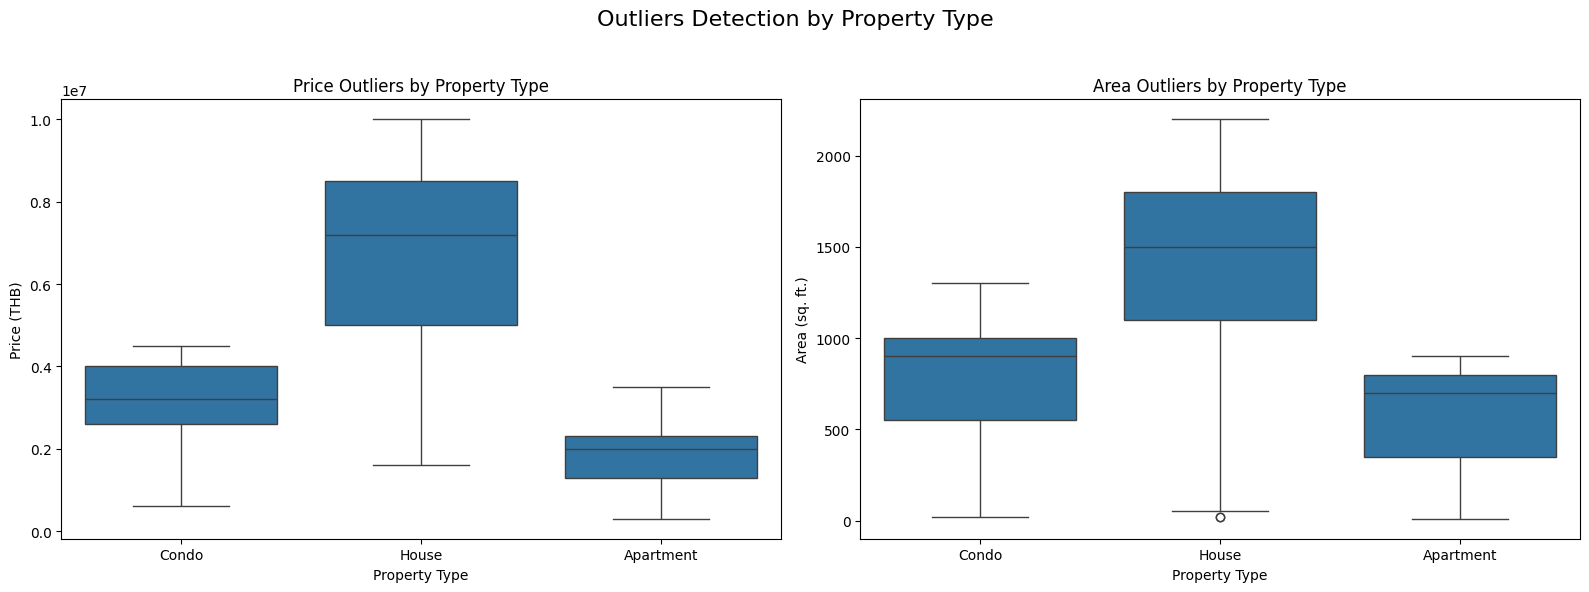

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Outliers Detection by Property Type', fontsize=16)

# Box plot for Price Outliers
sns.boxplot(x='Property Type', y='Price (THB)', data=df, ax=axs[0])
axs[0].set_title('Price Outliers by Property Type')

# Box plot for Area Outliers
sns.boxplot(x='Property Type', y='Area (sq. ft.)', data=df, ax=axs[1])
axs[1].set_title('Area Outliers by Property Type')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert categorical data into dummy variables (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['Property Type', 'Location'], drop_first=True)

# Define features and target variable
X = df_encoded[['Area (sq. ft.)', 'Bedrooms', 'Bathrooms'] +
               [col for col in df_encoded.columns if 'Property Type_' in col or 'Location_' in col]]
y = df_encoded['Price (THB)']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 165451.28483813413
Mean Squared Error: 51730386480.20708
R-squared: 0.992758955587809


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Model evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')


Mean Absolute Error: 53198.37758112095
Mean Squared Error: 42812344825.467064
R-squared: 0.994007272874525


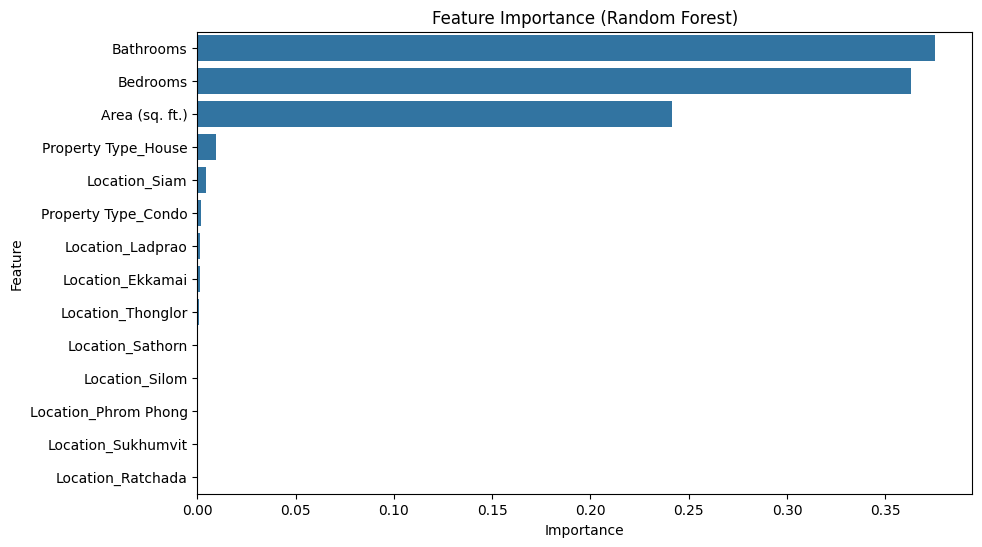

                 Feature  Importance
2              Bathrooms    0.375543
1               Bedrooms    0.362862
0         Area (sq. ft.)    0.241660
4    Property Type_House    0.009466
10         Location_Siam    0.004140
3    Property Type_Condo    0.001831
6       Location_Ladprao    0.001489
5       Location_Ekkamai    0.001426
13     Location_Thonglor    0.000867
9       Location_Sathorn    0.000305
11        Location_Silom    0.000150
7   Location_Phrom Phong    0.000099
12    Location_Sukhumvit    0.000087
8      Location_Ratchada    0.000076


In [12]:
# Get feature importance from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a dataframe for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Display feature importance values
print(importance_df)
